In [1]:
import pandas as pd

In [55]:
df = pd.read_csv('hotel_features.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_names    886 non-null    object
 1   prices         354 non-null    object
 2   total_reviews  886 non-null    object
 3   url            691 non-null    object
 4   ratings        805 non-null    object
dtypes: object(5)
memory usage: 34.7+ KB


In [11]:
# remove duplicants
len(df)


886

In [53]:
# sort values
df.sort_values('hotel_names', inplace = True)

In [54]:
df.nunique()

hotel_names       810
prices            224
total_reviews     512
url               612
ratings            10
number_reviews    512
prices_int        187
ratings_int        10
dtype: int64

In [6]:
# extractiing duplicates hotels
non_duplicates = ~df['hotel_names'].duplicated()

In [7]:
df = df[non_duplicates]

In [5]:
# data claning
# look for duplicates 
# look for null
# replace the null with the mean
# look for outlayers
# optimatization de la memoria

In [ ]:
# Cleaning Prices Feature

In [8]:
# remove $
# remove \n
# conver to number

In [8]:
# def convert_str_int(s):
#     return int(s.replace(",","").split(' ')[0])


In [9]:
# df['number_reviews'] = df['total_reviews'].apply(convert_str_int)

In [17]:
df['number_reviews'] = df['total_reviews'].apply(lambda x : int(x.replace(',' , '').split(' ')[0]))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 74 to 716
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_names     810 non-null    object
 1   prices          301 non-null    object
 2   total_reviews   810 non-null    object
 3   url             616 non-null    object
 4   ratings         729 non-null    object
 5   number_reviews  810 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.3+ KB


In [26]:

# df["try_prices"] = df.prices.str.split()
# df.explode("try_prices").reset_index(drop=True)
# df["try_prices"].iloc[200:250]

In [19]:
df.fillna('0' , inplace = True)

In [20]:
df['prices_int'] = df['prices'].apply(lambda x : int(x.replace("$","").split('\n')[0].replace(',',"")))

In [27]:
# Replace zero values for the mean in prices feature
mean_prices_int = df['prices_int'].mean(skipna=True)
df['prices_int']=df.prices_int.mask(df.prices_int == 0,mean_prices_int)


## Ratings

In [44]:
df['ratings_int'] = df['ratings'].apply(lambda x : float(x.split()[0]))

In [49]:
df['ratings_int'].value_counts().sort_index(ascending=False)


5.0     42
4.5    221
4.0    227
3.5    106
3.0     54
2.5     34
2.0     23
1.5      7
1.0     15
0.0     81
Name: ratings_int, dtype: int64

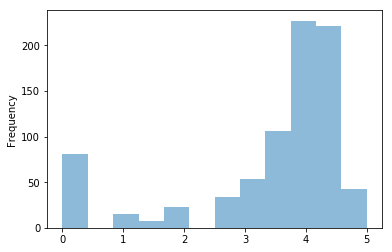

In [52]:
df['ratings_int'].plot.hist(bins=12, alpha=0.5)

In [ ]:
''Write a function that checks if a string can be entirely reconstructed by taking a substring pattern from the main string and repeating it multiple times.'''

'''ex: 'ababab' returns True, 'aaaaaa' = True, 'abcdfabcdf' = True, 'ababcd' returns False'''

In [ ]:
def repeating(string):
  #find substring
  length = len(string) - 1
  subs = []
  for i in range(len(string)):
    substring = string[0:i]
    subs.append(substring)
  subs.remove('')
  #check if any of the substrings repeat
  for sub in subs:
    #see if string is divisible by substring
    if int(len(string)) % int(len(sub)) == 0:
      divisions = len(string) / len(sub)
      if string == sub * int(divisions):
        return True
  return False


In [ ]:
import collections
import numpy as np
​
​
def substring(string):
  split = [x for x in string]
  unique = np.unique(split)
  letters = collections.defaultdict(int)
  for letter in string: 
    letters[letter] += 1
  if len(set(letters.values())) != 1:
    return False
  combined = "".join(unique)
  times = string.count(combined)
  if len(string) % times == 0: 
    return True

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import numpy as np
raw_data = {'employee_name': ['Andy', 'Beth', 'Cindy', "Dale"],
            'employee_id': [123456,789456,654123,963852],
            'date_joined': ['2015-02-15', np.nan, '2017-05-16', "2018-01-15"],
            'age': [45,36,34,25],
            'yrs_of_experience': [24,14,14,4]}
df = pd.DataFrame(raw_data, columns = ['employee_name', 'employee_id', 'date_joined','age', 'yrs_of_experience'])
df

,employee_name,employee_id,date_joined,age,yrs_of_experience
0,Andy,123456,2015-02-15,45,24
1,Beth,789456,NaN,36,14
2,Cindy,654123,2017-05-16,34,14
3,Dale,963852,2018-01-15,25,4


In [ ]:
Company XYZ recently migrated database systems causing some of the date_joined records to be NULL. You're told by an analyst in human resources NULL records for the date_joined field indicates the employees joined prior to 2010.

Question: Can you write code using pandas that finds the number of employees that joined each year-month? You can group all of the NULL values as Dec 1, 2009.

In [5]:
df['date_joined'] = df['date_joined'].fillna('2019-12-01')
x = df.groupby(df['date_joined'].dt.year).count()
x
y = df.groupby(df['date_joined'].dt.month).count()
y

,employee_name,employee_id,date_joined,age,yrs_of_experience,year,month
date_joined,,,,,,,
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1


In [3]:
df['date_joined'] = pd.to_datetime(df['date_joined'])
df.groupby(df['date_joined'].dt.year)['employee_name'].agg(['count'])

,count
date_joined,
2010,1
2015,1
2017,1
2018,1


In [20]:
df['date_joined'] = pd.to_datetime(df['date_joined'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   employee_name      4 non-null      object        
 1   employee_id        4 non-null      int64         
 2   date_joined        4 non-null      datetime64[ns]
 3   age                4 non-null      int64         
 4   yrs_of_experience  4 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 288.0+ bytes


In [2]:
df = df.fillna('2010-12-01')
df['year'] = df.date_joined.apply(lambda x: x[:4])
df['month'] = df.date_joined.apply(lambda x: x[5:7])
df_group = df.groupby(['year', 'month'])['employee_name'].count()
df_group.head()

year  month
2010  12       1
2015  02       1
2017  05       1
2018  01       1
Name: employee_name, dtype: int64

In [30]:
df.date_joined.fillna("2009-12-01", inplace = True)
df.date_joined = pd.to_datetime(df.date_joined)
df.resample('M', on='date_joined').mean().dropna().count()




employee_id          4
age                  4
yrs_of_experience    4
dtype: int64

In [6]:
xx = ['a','b',['c','d',['e']]]

In [9]:
n = 'e'
if  n in xx:
    print(True)

In [24]:
for i in xx:
#     print(i)
    for m in i:
        if n in i:
            print(False)

        for u in m:
            pass
#             if n in m:
#                 print(True)
    

In [25]:
Example 1: Input: {1, 2, 3}, 3 --> (1 ^ 3 + 2 ^ 3 + 3 ^ 3 ) - (1 + 2 + 3) --> 36 - 6 --> Output: 30

SyntaxError: invalid syntax (<ipython-input-25-cec421d5c837>, line 1)

In [32]:
p = [1,2,3]
for i in p:
    print(i)
    i ** 3
#     l = x - sum(p)
# print(l)

1
2
3


In [38]:
c = sum([i **3 for i in p]) - sum(p)

In [39]:
c

30

In [35]:
x = [i ** 2 for i in p]

In [36]:
x

[1, 4, 9]

In [44]:
# "Chicago"  -->  "c:**,h:*,i:*,a:*,g:*,o:*"
s = "Chicago"

In [70]:
dic = {}
for i in s.lower():
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1
dic
    

''

In [53]:
from collections import Counter

In [55]:
m = Counter(s.lower())

In [67]:
for k , v in m.items():
    if v == 2:
        m[k] = '**'
    if v == 1:
        m[k] = '*'
m

Counter({'c': '**', 'h': '*', 'i': '*', 'a': '*', 'g': '*', 'o': '*'})

In [ ]:
s = ''
for i in s.lower():
    if i in s:
        